Analysis of the mushroom dataset
Michael Danaher - 18221726
Aaron Foster - 18232086
Bandile Tshabalala - 18246923
John Maguire - 18250076

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import manifold #needed for multidimensional scaling (MDS) and t-SNE
from sklearn import cluster #needed for k-Means clustering
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv("mushrooms_sample.csv")
df.head()

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,x,f,e,t,n,f,c,b,u,t,...,p,g,p,w,o,p,k,v,d,e
1,f,y,g,t,n,f,c,b,u,t,...,w,g,p,w,o,p,k,v,d,e
2,x,s,p,t,n,f,c,b,w,e,...,w,e,p,w,t,e,w,c,w,e
3,b,s,w,f,n,f,w,b,g,e,...,w,w,p,w,t,p,w,n,g,e
4,f,y,e,t,n,f,c,b,w,t,...,p,p,p,w,o,p,n,v,d,e


In [3]:
df.shape

(4000, 23)

In [4]:
df.tail()

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
3995,f,y,e,f,y,f,c,n,b,t,...,p,p,p,w,o,e,w,v,p,p
3996,f,s,w,t,n,f,c,b,w,e,...,w,w,p,w,t,p,r,v,g,p
3997,f,s,w,t,n,f,c,b,w,e,...,w,w,p,w,t,p,r,v,m,p
3998,f,y,e,f,s,f,c,n,b,t,...,p,p,p,w,o,e,w,v,l,p
3999,f,s,n,f,y,f,c,n,b,t,...,p,w,p,w,o,e,w,v,d,p


In [5]:
df.isna().sum()

cap-shape                      0
cap-surface                    0
cap-color                      0
bruises%3F                     0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  1230
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
class                          0
dtype: int64

In [6]:
df_original = df
df['class'].unique()

array(['e', 'p'], dtype=object)

In [7]:
labelencoder=LabelEncoder()
for col in df.columns:
    if len(df[col].value_counts())==2:

        df[col]=labelencoder.fit_transform(df[col])

df.head()

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,x,f,e,1,n,1,0,0,u,1,...,p,g,p,w,o,p,k,v,d,0
1,f,y,g,1,n,1,0,0,u,1,...,w,g,p,w,o,p,k,v,d,0
2,x,s,p,1,n,1,0,0,w,0,...,w,e,p,w,t,e,w,c,w,0
3,b,s,w,0,n,1,1,0,g,0,...,w,w,p,w,t,p,w,n,g,0
4,f,y,e,1,n,1,0,0,w,1,...,p,p,p,w,o,p,n,v,d,0


c:\users\john\pycharmprojects\dqn\venv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


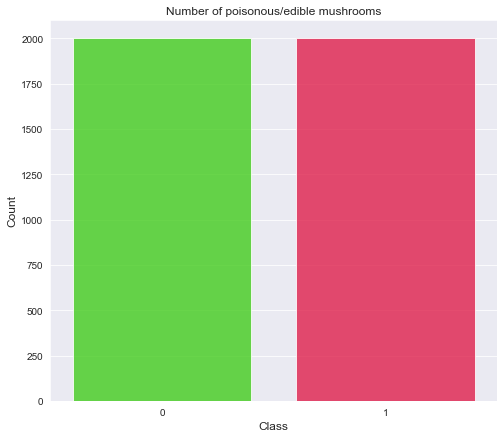

In [8]:
count = df['class'].value_counts()
plt.figure(figsize=(8,7))
sns.barplot(count.index, count.values, alpha=0.8, palette="prism")
plt.ylabel('Count', fontsize=12)
plt.xlabel('Class', fontsize=12)
plt.title('Number of poisonous/edible mushrooms')
#plt.savefig("mushrooms1.png", format='png', dpi=500)
plt.show()

<AxesSubplot:>

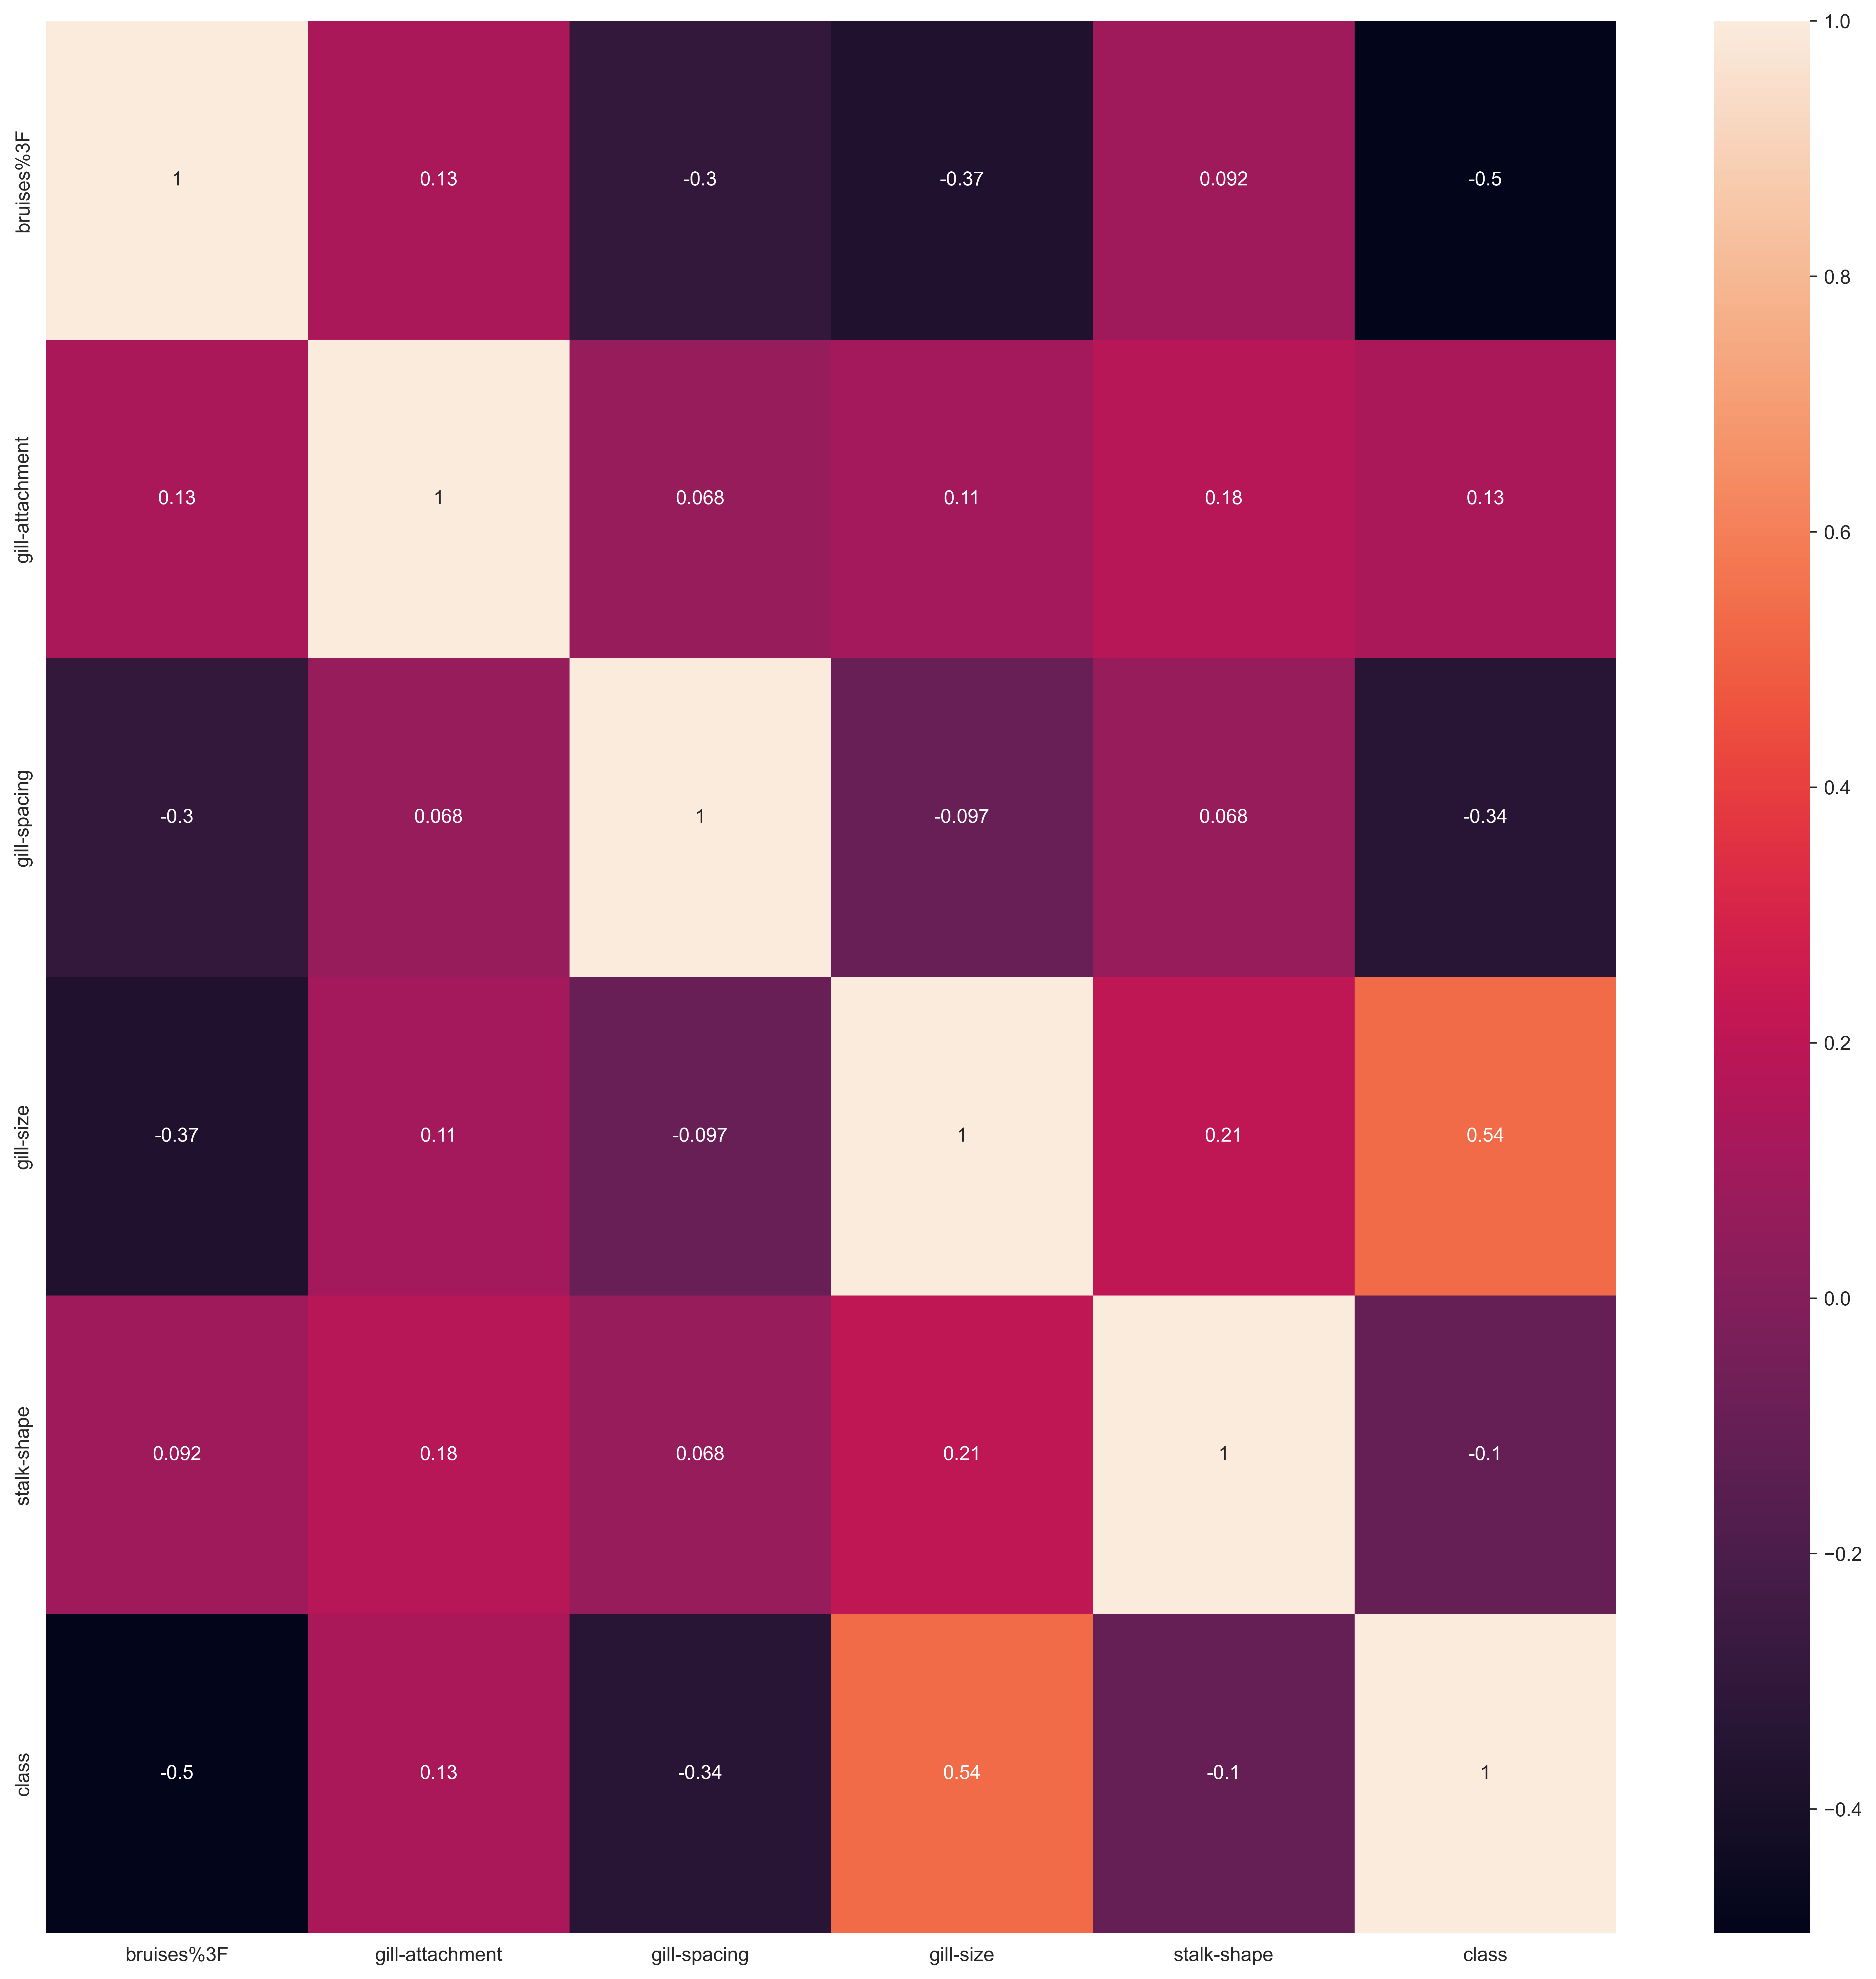

In [9]:
plt.figure(figsize=(18,18),dpi=500)
sns.heatmap(df.corr(),annot=True)

In [10]:
df = pd.get_dummies(df, columns=["stalk-root"],
                        dummy_na=True,
                        drop_first=True)
df.tail()

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,ring-number,ring-type,spore-print-color,population,habitat,class,stalk-root_c,stalk-root_e,stalk-root_r,stalk-root_nan
3995,f,y,e,0,y,1,0,1,b,1,...,o,e,w,v,p,1,0,0,0,1
3996,f,s,w,1,n,1,0,0,w,0,...,t,p,r,v,g,1,0,0,0,0
3997,f,s,w,1,n,1,0,0,w,0,...,t,p,r,v,m,1,0,0,0,0
3998,f,y,e,0,s,1,0,1,b,1,...,o,e,w,v,l,1,0,0,0,1
3999,f,s,n,0,y,1,0,1,b,1,...,o,e,w,v,d,1,0,0,0,1


In [11]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,bruises%3F,gill-attachment,gill-spacing,gill-size,stalk-shape,class,stalk-root_c,stalk-root_e,stalk-root_r,stalk-root_nan,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,1,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,1,1,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,0,1,1,0,0,0,0,0,0,1,...,1,0,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [12]:
df.isnull().sum()

bruises%3F         0
gill-attachment    0
gill-spacing       0
gill-size          0
stalk-shape        0
                  ..
habitat_l          0
habitat_m          0
habitat_p          0
habitat_u          0
habitat_w          0
Length: 96, dtype: int64

In [13]:
df.describe()

,bruises%3F,gill-attachment,gill-spacing,gill-size,stalk-shape,class,stalk-root_c,stalk-root_e,stalk-root_r,stalk-root_nan,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
count,4000.00000,4000.000000,4000.000000,4000.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,...,4000.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.41650,0.975250,0.154000,0.319000,0.56250,0.500000,0.066500,0.136250,0.022750,0.307500,...,0.048250,0.15075,0.507000,0.209750,0.255750,0.101000,0.037000,0.145500,0.049250,0.024500
std,0.49304,0.155382,0.360994,0.466147,0.49614,0.500063,0.249185,0.343097,0.149124,0.461516,...,0.214321,0.35785,0.500014,0.407181,0.436336,0.301366,0.188785,0.352648,0.216417,0.154615
min,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.00000,1.000000,0.000000,0.000000,1.00000,0.500000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.00000,1.000000,0.000000,1.000000,1.00000,1.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.00000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.00000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
X=df.drop(['class'],axis=1)
X.head()

,bruises%3F,gill-attachment,gill-spacing,gill-size,stalk-shape,stalk-root_c,stalk-root_e,stalk-root_r,stalk-root_nan,cap-shape_c,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,1,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,1,1,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0,1,1,0,0,0,0,0,1,0,...,1,0,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [15]:
y=df['class']
y=df.head()

In [16]:
#min_max_scaler = preprocessing.MinMaxScaler()
#df = min_max_scaler.fit_transform(df)

In [17]:
colors = np.array(['orange', 'blue', 'lime', 'blue', 'khaki', 'pink', 'green', 'purple'])

def clustering_scatterplot(points, labels, centers, title):


    n_clusters = np.unique(labels).size
    for i in range(n_clusters):
        h = plt.scatter(points[labels==i,0],
                        points[labels==i,1],
                        c=colors[i%colors.size],
                        label = 'cluster '+str(i))

    # plot the centers of the clusters
    if centers is not None:
        plt.scatter(centers[:,0], centers[:,1], c='r', marker='*', s=500)

    _ = plt.title(title)
    _ = plt.legend()
    _ = plt.xlabel('x')
    _ = plt.ylabel('y')

In [18]:
k = 2

In [19]:
clustered_df = cluster.KMeans(n_clusters=k, n_init=10, max_iter=300).fit(df)

In [20]:
data_and_centers = np.r_[df,clustered_df.cluster_centers_]

In [21]:
XYcoordinates = manifold.MDS(n_components=2).fit_transform(data_and_centers)
print("transformation complete")

transformation complete


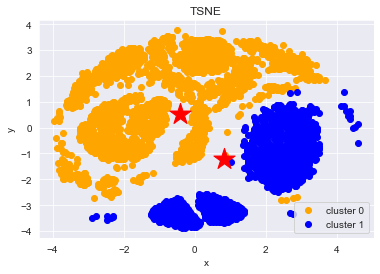

In [22]:
clustering_scatterplot(points=XYcoordinates[:-k,:],
                       labels=clustered_df.labels_,
                       centers=XYcoordinates[-k:,:],
                       title='TSNE')


In [40]:
df['cluster'] = pd.Series(clustered_df.labels_, index=df.index)
df.head()

,bruises%3F,gill-attachment,gill-spacing,gill-size,stalk-shape,class,stalk-root_c,stalk-root_e,stalk-root_r,stalk-root_nan,...,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w,cluster
0,1,1,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,1,1,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,0,1,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [51]:
df.groupby('cluster').mean()

,bruises%3F,gill-attachment,gill-spacing,gill-size,stalk-shape,class,stalk-root_c,stalk-root_e,stalk-root_r,stalk-root_nan,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
cluster,,,,,,,,,,,,,,,,,,,,,
0,0.683067,0.962690,0.248872,0.155802,0.565806,0.181632,0.100451,0.223452,0.03731,0.140631,...,0.079131,0.247232,0.333743,0.210332,0.337023,0.047150,0.060681,0.02501,0.080771,0.04018
1,0.000000,0.994875,0.005766,0.573991,0.557335,0.997438,0.013453,0.000000,0.00000,0.568225,...,0.000000,0.000000,0.777707,0.208840,0.128764,0.185138,0.000000,0.33376,0.000000,0.00000


In [41]:
df.index

RangeIndex(start=0, stop=4000, step=1)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 97 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   bruises%3F                  4000 non-null   int32
 1   gill-attachment             4000 non-null   int32
 2   gill-spacing                4000 non-null   int32
 3   gill-size                   4000 non-null   int32
 4   stalk-shape                 4000 non-null   int32
 5   class                       4000 non-null   int32
 6   stalk-root_c                4000 non-null   uint8
 7   stalk-root_e                4000 non-null   uint8
 8   stalk-root_r                4000 non-null   uint8
 9   stalk-root_nan              4000 non-null   uint8
 10  cap-shape_c                 4000 non-null   uint8
 11  cap-shape_f                 4000 non-null   uint8
 12  cap-shape_k                 4000 non-null   uint8
 13  cap-shape_s                 4000 non-null   uint8
 14  cap-shap

In [43]:
df.dtypes

bruises%3F         int32
gill-attachment    int32
gill-spacing       int32
gill-size          int32
stalk-shape        int32
                   ...  
habitat_m          uint8
habitat_p          uint8
habitat_u          uint8
habitat_w          uint8
cluster            int32
Length: 97, dtype: object

In [64]:
x=df[['bruises%3F', 'gill-attachment', 'gill-spacing', 'stalk-shape', 'class']]
y=df['cluster']

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [92]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42)

In [93]:
lr = LogisticRegression()

In [94]:
lr.fit(x_train, y_train)

LogisticRegression()

In [95]:
predict = lr.predict(x_test)


In [96]:
from sklearn.metrics import confusion_matrix

In [97]:
pd.DataFrame(confusion_matrix(y_test,predict),columns=['Predicted No', 'Predicted Yes'], index=['Actual No', 'Actual Yes'])

,Predicted No,Predicted Yes
Actual No,973,22
Actual Yes,4,601


In [98]:
from sklearn.metrics import classification_report

In [99]:
print(classification_report(y_test, predict))


              precision    recall  f1-score   support

           0       1.00      0.98      0.99       995
           1       0.96      0.99      0.98       605

    accuracy                           0.98      1600
   macro avg       0.98      0.99      0.98      1600
weighted avg       0.98      0.98      0.98      1600

